# Finding optimal parameters

Suppose we want to minimize OAR average dose subject to a PTV D95 constraint.
One simple, but inefficient, way is to do a coarse grid search.
Here we only look at modifying the OAR dose and volume parameters, but we could also search over the PTV dose parameter and the OAR and PTV weights.
Of course, the  more parameters (and organs) we add, the more dimensions we have to contend with, so all the more reason to find a more efficient method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load results
doses = np.load('doses.npy')
volumes = np.load('volumes.npy')
oar_avg = np.load('oar_avg_dv.npy')
ptv_d95 = np.load('ptv_d95_dv.npy')

In [74]:
# Interpolate bad values
ptv_d95[0, 2] = (ptv_d95[0, 1] + ptv_d95[0, 3])/2.0
oar_avg[0, 2] = (oar_avg[0, 1] + oar_avg[0, 3])/2.0

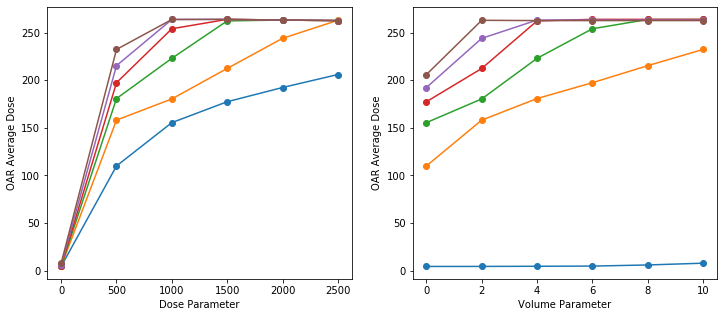

In [75]:
# Plot OAR dose vs. OAR dose and percent parameters 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(doses)):
    ax[0].plot(doses, oar_avg[:, ii], 'o-')
    ax[1].plot(volumes, oar_avg[ii, :], 'o-')

ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('OAR Average Dose')
ax[1].set_xlabel('Volume Parameter')
ax[1].set_ylabel('OAR Average Dose');

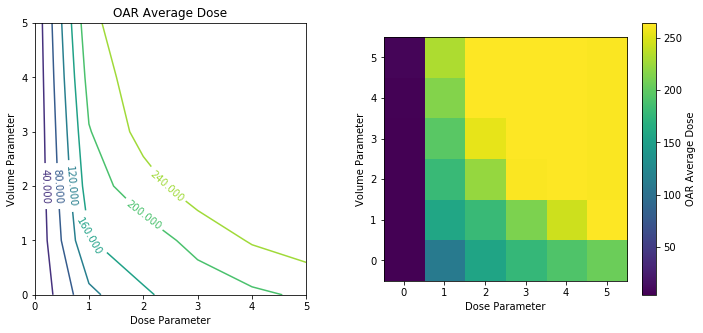

In [84]:
# Plot OAR dose vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im0 = ax[0].contour(oar_avg.T)
ax[0].clabel(im0)
ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('Volume Parameter')
ax[0].set_title('OAR Average Dose')
ax[0].axis('square')

im1 = ax[1].imshow(oar_avg.T, origin='lower')
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter')
plt.colorbar(im1, label='OAR Average Dose');

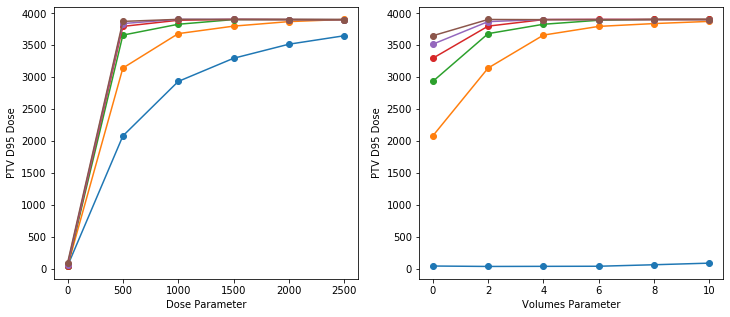

In [77]:
# Plot PTV D95 vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(doses)):
    ax[0].plot(doses, ptv_d95[:, ii], 'o-')
    ax[1].plot(volumes, ptv_d95[ii, :], 'o-')   

ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('PTV D95 Dose')
ax[1].set_xlabel('Volumes Parameter')
ax[1].set_ylabel('PTV D95 Dose');

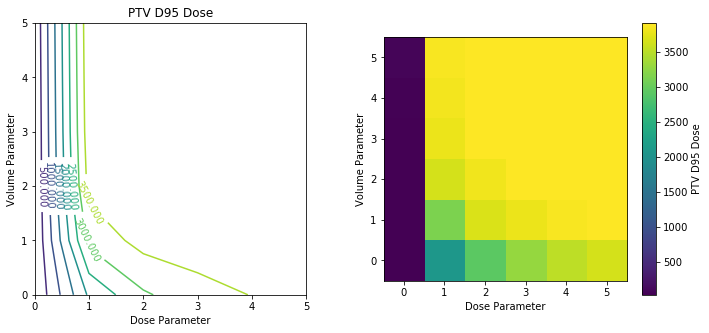

In [78]:
# Plot PTV D95 vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im0 = ax[0].contour(ptv_d95.T)
ax[0].clabel(im0)
ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('Volume Parameter')
ax[0].set_title('PTV D95 Dose')
ax[0].axis('square')

im1 = ax[1].imshow(ptv_d95.T, origin='lower')
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter')
plt.colorbar(im1, label='PTV D95 Dose');

Suppose we want to minimize OAR dose subject to PTV D95 dose >= 3800.

In [79]:
min_dose = 1e6
opt_dose = -1
opt_volume = -1
for ii in range(len(doses)):
    for jj in range(len(volumes)):
        if ptv_d95[ii, jj] >= 3800:
            if oar_avg[ii, jj] < min_dose:
                min_dose = oar_avg[ii, jj]
                opt_dose =  doses[ii]
                opt_volume = volumes[jj]
print(f'Dose: {opt_dose}, Volume: {opt_volume}, Min dose: {min_dose}')

Dose: 500.0, Volume: 8.0, Min dose: 215.38688865777647


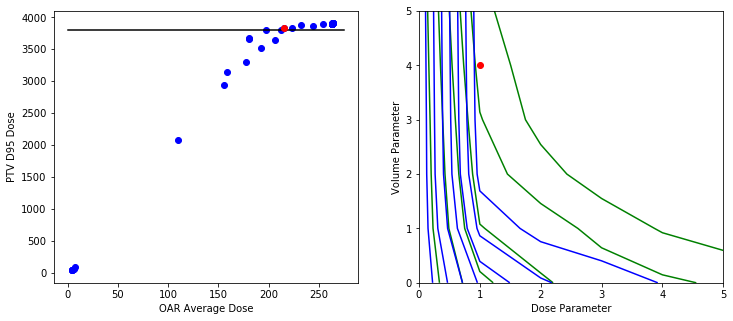

In [80]:
# Plot PTV D95 vs. OAR dose
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(doses)):
    for jj in range(len(volumes)):
        ax[0].plot(oar_avg[ii, jj], ptv_d95[ii, jj], 'bo')
ax[0].set_xlabel('OAR Average Dose')
ax[0].set_ylabel('PTV D95 Dose')
ax[0].plot([0, 275], [3800, 3800], 'k')
ax[0].plot(oar_avg[1, 4], ptv_d95[1, 4], 'ro')

ax[1].contour(oar_avg.T, colors='g')
ax[1].contour(ptv_d95.T, colors='b')
ax[1].plot(1, 4, 'ro')
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter');

# Compare with approved plan

In [85]:
# Need to go back into greatment planning system and grad values
# Check optimization options, like number of iterations... do they compare?
# Check back about ResetOptimization()
# How are things initialized? Does this affect results?
# On my previous results, did I make sure to reset parameter (e.g., weights?)